# Linear Regression 

In [1]:
import numpy as np
from numpy.linalg import inv, pinv
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import os

np.random.seed(42)

## Linear Regression with One Variable

### Loading Dataset

In [2]:
df = pd.read_csv(r'./HW2_Dataset/dataset1.csv')

In [3]:
df.head()

x        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233

In [4]:
df.shape

(97, 2)

In [5]:
X = df['x'].to_numpy().reshape(-1, 1)
y = df['y'].to_numpy().reshape(-1, 1)
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

In [6]:
X_with_bias.shape

(97, 2)

Loss history dict for latter recording of loss

In [7]:
loss_history = {'SGD':[], 'GD':[], 'Ground Truth Loss':[]}

### 1. Cost Function

$$MSE = \frac{1}{n}\sum_{i = 1}^n (y^i - \hat{y}^i)^2$$

In [4]:
def MSE(y, y_hat):
    
    return np.mean(np.square(y - y_hat))

### a. Closed Form Solution
$$\theta = (X^TX)^{-1}X^T\vec{y}$$

In [9]:
inv_XTX = inv(np.matmul(X_with_bias.T,X_with_bias))
W_c = inv_XTX @ X_with_bias.T @ y

print("W Closed Form is : ", W_c)
print("Shape of W : ", W_c.shape)

W Closed Form is :  [[-3.89578088]
 [ 1.19303364]]
Shape of W :  (2, 1)


**Closed Form Solution**
$$
y = \theta_0 + \theta_1x
$$
where:
$$
\theta_0 = -3.8957\\
\theta_1 = 1.1930
$$

### b. Stochastic Gradient Descent

In [10]:
lr: float = 1e-2
iters: int = 1500
W_sgd = np.random.rand(X_with_bias.shape[1], 1)


for iter in tqdm(range(iters)):
    for sample_idx in range(X_with_bias.shape[0]):
        x_sgd = X_with_bias[sample_idx] # a vector (1, 2)
        y_sgd = y[sample_idx] # a scalar 
        y_pred_sgd = x_sgd @ W_sgd # y hat
        
        dJ_dW = (y_sgd - y_pred_sgd) * x_sgd # Computing dJ/dw
        dJ_dW = dJ_dW.reshape(-1, 1) # reshape to be (2, 1) instead of (2, )
        W_sgd = W_sgd + lr * dJ_dW # Updating Parameters

    # Recording loss at each iteration
    y_pred = X_with_bias @ W_sgd
    loss_history['SGD'].append(MSE(y, y_pred))

100%|██████████| 1500/1500 [00:01<00:00, 1363.04it/s]


In [11]:
W_sgd

array([[-3.84815292],
       [ 1.05705257]])

**Stochastic Gradient Descent Solution**
$$
y = \theta_0 + \theta_1x
$$
where:
$$
\theta_0 = -3.8481\\
\theta_1 = 1.0570
$$

### c. Batch Gradient Descent

In [12]:
lr: float = 1e-2
epochs: int = 1500
W_gd = np.random.rand(X_with_bias.shape[1], 1)


for iter in tqdm(range(epochs)):
    y_pred_gd = X_with_bias @ W_gd 
        
    dJ_dW = (X_with_bias.T @ (y - y_pred_gd)) / len(y) # Calculating gradient in a vectorized way
        
    W_gd = W_gd + lr * dJ_dW # Updating Parameters
    
    
    # Recording loss at each epoch
    y_pred = X_with_bias @ W_gd
    loss_history['GD'].append(MSE(y, y_pred))

100%|██████████| 1500/1500 [00:00<00:00, 15492.11it/s]


In [13]:
W_gd

array([[-3.58587263],
       [ 1.1619    ]])

**Batch Gradient Descent Solution**
$$
y = \theta_0 + \theta_1x
$$
where:
$$
\theta_0 = -3.5858\\
\theta_1 = 1.1619
$$

### 3. Plot Dataset and Fitted Lines

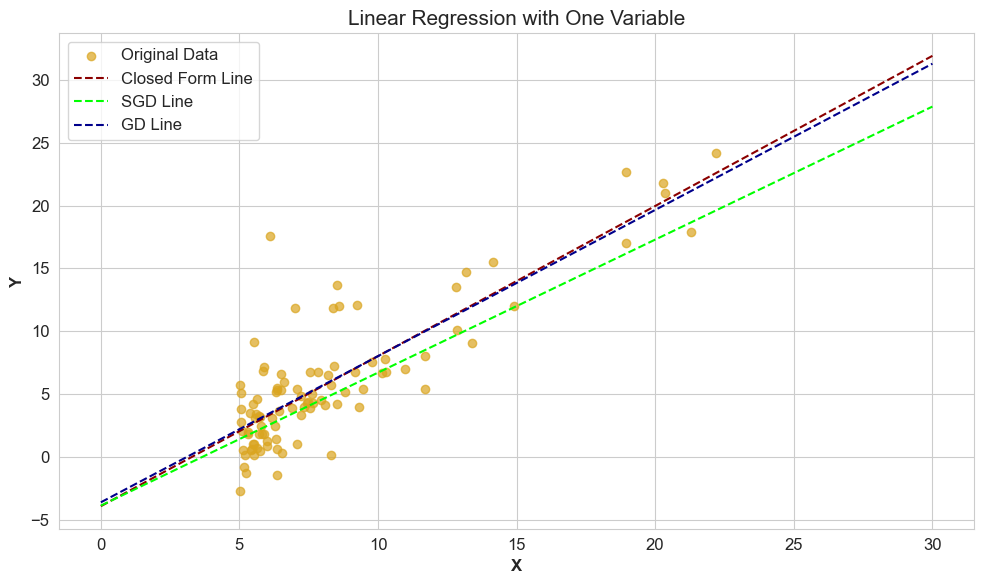

In [14]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'


# Plotting data
plt.scatter(X, y, color='goldenrod', alpha=0.7, label='Original Data')

# Plotting lines
lines = {'Closed Form': W_c.flatten(),'SGD': W_sgd.flatten(), 'GD': W_gd.flatten() }

colors = ['darkred', 'lime', 'darkblue']
for idx, (name, (w1, w2)) in enumerate(lines.items()):
    y_line = w1 + w2 * np.array([0, 30])
    
    plt.plot(np.array([0, 30]), y_line, 
             color=colors[idx], 
             linestyle='--', 
             linewidth=1.5, 
             label=f'{name} Line')

plt.title('Linear Regression with One Variable', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 4. Prediction

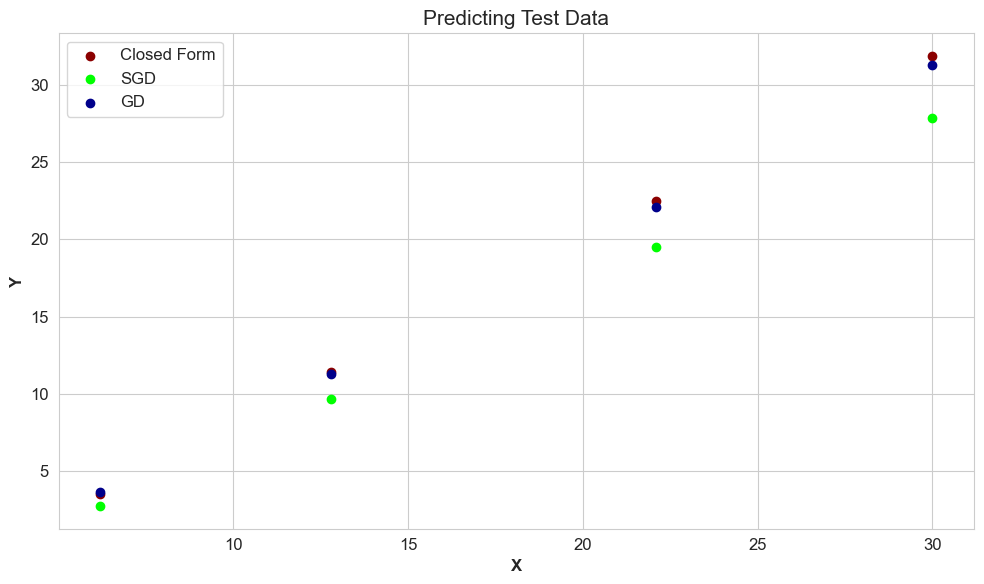

In [15]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'


colors = ['darkred', 'lime', 'darkblue']

X_test = np.array([6.2, 12.8, 22.1, 30])

for idx, (name, (w1, w2)) in enumerate(lines.items()):
    y_pred = w1 + w2 * X_test
    
    plt.scatter(X_test, y_pred, color=colors[idx], label=f'{name}')
    
    
    
plt.title('Predicting Test Data', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 5. Comparing Parameter $\theta$ of Lines

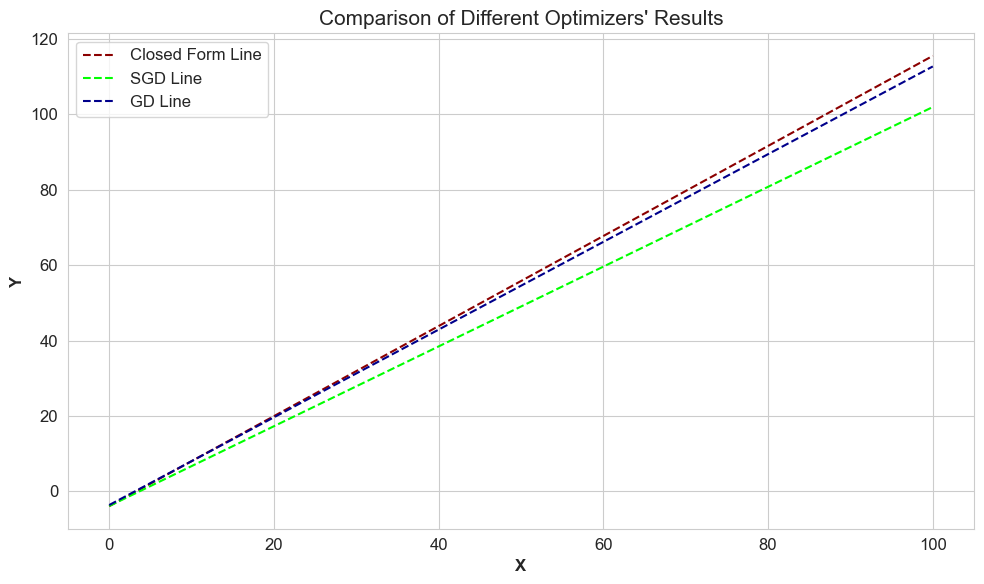

In [16]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting lines
lines = {'Closed Form': W_c.flatten(),'SGD': W_sgd.flatten(), 'GD': W_gd.flatten() }

colors = ['darkred', 'lime', 'darkblue']
for idx, (name, (w1, w2)) in enumerate(lines.items()):
    y_line = w1 + w2 * np.array([0, 100])
    
    plt.plot(np.array([0, 100]), y_line, 
             color=colors[idx], 
             linestyle='--', 
             linewidth=1.5, 
             label=f'{name} Line')

plt.title('Comparison of Different Optimizers\' Results', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 6. Plotting Cost Function

In [17]:
# Prepare and adding ground truth loss to the loss_history

y_pred_closed_form = X_with_bias @ W_c
gnd_loss = MSE(y, y_pred_closed_form)
loss_history['Ground Truth Loss'] = [gnd_loss for i in range(len(loss_history['SGD']))]

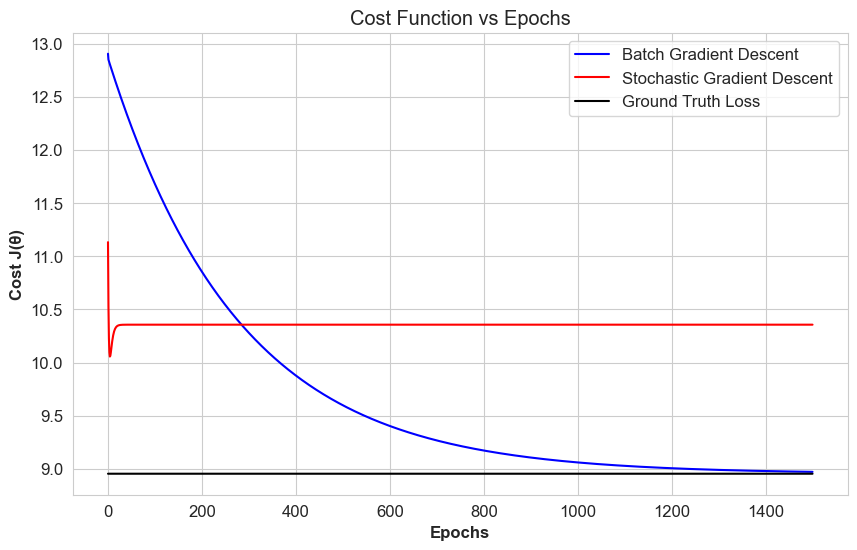

In [18]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(range(len(loss_history['GD'])), loss_history['GD'], label='Batch Gradient Descent', color='blue')
plt.plot(range(len(loss_history['SGD'])), loss_history['SGD'], label='Stochastic Gradient Descent', color='red')
plt.plot(range(len(loss_history['Ground Truth Loss'])), loss_history['Ground Truth Loss'], label='Ground Truth Loss', color='Black')

plt.xlabel('Epochs')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Epochs')
plt.legend()
plt.show()

## Multiple Variable Regression

### Loading Dataset

In [5]:
df_train = pd.read_csv(r'./HW2_Dataset/train.csv')
df_test = pd.read_csv(r'./HW2_Dataset/test.csv')

In [6]:
df_train.head()

age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [7]:
df_test.head()

age gender    bmi  children smoker     region      charges
0   30   male  22.99         2    yes  northwest  17361.76610
1   24   male  32.70         0    yes  southwest  34472.84100
2   24   male  25.80         0     no  southwest   1972.95000
3   48   male  29.60         0     no  southwest  21232.18226
4   47   male  19.19         1     no  northeast   8627.54110

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   gender    1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       150 non-null    int64  
 1   gender    150 non-null    object 
 2   bmi       150 non-null    float64
 3   children  150 non-null    int64  
 4   smoker    150 non-null    object 
 5   region    150 non-null    object 
 6   charges   150 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 8.3+ KB


### Data Preprocessing

#### Encoding Categorical Features

In [10]:
# Integer Encoding
df_train['gender'] = df_train['gender'].astype('category').cat.codes
df_train['smoker'] = df_train['smoker'].astype('category').cat.codes

df_test['gender'] = df_test['gender'].astype('category').cat.codes
df_test['smoker'] = df_test['smoker'].astype('category').cat.codes

In [11]:
# OHE Encoding
df_train = pd.get_dummies(df_train, columns=['region'])
df_test = pd.get_dummies(df_test, columns=['region'])

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1000 non-null   int64  
 1   gender            1000 non-null   int8   
 2   bmi               1000 non-null   float64
 3   children          1000 non-null   int64  
 4   smoker            1000 non-null   int8   
 5   charges           1000 non-null   float64
 6   region_northeast  1000 non-null   bool   
 7   region_northwest  1000 non-null   bool   
 8   region_southeast  1000 non-null   bool   
 9   region_southwest  1000 non-null   bool   
dtypes: bool(4), float64(2), int64(2), int8(2)
memory usage: 37.2 KB


#### $\log$ Scaling Target Column

In [13]:
df_train['charges'] = np.log(df_train['charges'])
df_test['charges'] = np.log(df_test['charges'])

In [14]:
df_train['charges'].head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

#### Squaring `bmi` Feature

In [15]:
df_train['bmi'] = df_train['bmi'] ** 2
df_test['bmi'] = df_test['bmi'] ** 2

#### Data Splitting

In [16]:
X_train = df_train.drop(columns=['charges']).to_numpy()
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

X_test = df_test.drop(columns=['charges']).to_numpy()
X_test= np.hstack([np.ones((X_test.shape[0], 1)), X_test])


y_train = df_train['charges'].to_numpy().reshape(-1, 1)
y_test = df_test['charges'].to_numpy().reshape(-1, 1)

#### Standardize Dataset

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Recording Results

In [18]:
result_history = {'SGD':dict(), 'GD': dict(), 'Ground Truth': dict()}

### Closed Form Solution

#### Preparing data

#### Calculation

In [22]:
for size in tqdm(range(10, X_train.shape[0] + 1, 10)):
    
    result_history["Ground Truth"][size] = {'train_loss_history':0, 'val_loss_history':0}
    
    X_train_slice = X_train[:size]
    y_train_slice = y_train[:size]
    inv_XTX = pinv(X_train_slice.T @ X_train_slice)
    W_c = inv_XTX @ X_train_slice.T @ y_train_slice
    
    y_hat = X_train_slice @ W_c 
    train_loss = MSE(y_hat, y_train_slice)
    result_history["Ground Truth"][size]['train_loss_history'] = train_loss
    
    y_hat = X_test @ W_c 
    test_loss = MSE(y_hat, y_test)
    result_history["Ground Truth"][size]['val_loss_history'] = test_loss




100%|██████████| 100/100 [00:02<00:00, 37.50it/s]


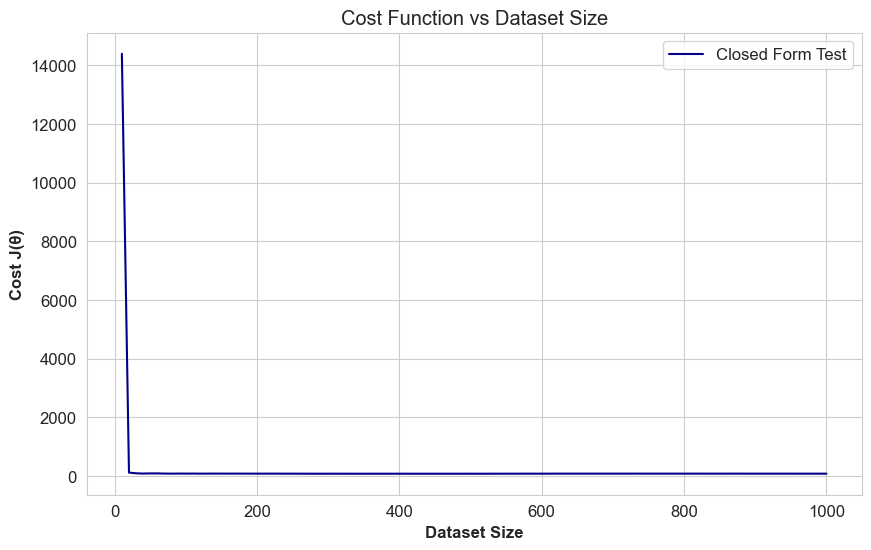

In [28]:
dataset_size = np.arange(10, X_train.shape[0] + 1, 10)

mean_val_loss = np.array([np.mean(result_history['Ground Truth'][size]['val_loss_history']) for size in dataset_size])


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(dataset_size, mean_val_loss, label='Closed Form Test', color='darkblue')

plt.xlabel('Dataset Size')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Dataset Size')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [31]:
lr: float = 1e-3
iters: int = 1500
W_sgd = np.zeros((X_train.shape[1], 1)) # params init random

for slice_idx in range(10, X_train.shape[0] + 1, 10):
    print(f'_______________Number of Data used is : {slice_idx}_______________')
    # X_train_sliced = X_train[slice_idx - 10:slice_idx] # Slicing training set
    X_train_sliced = X_train[:slice_idx] # Slicing training set
    y_train_sliced = y_train[:slice_idx]
    
    W_sgd = np.zeros((X_train.shape[1], 1)) # params init random
    
    
    result_history['SGD'][slice_idx] = {'train_loss_history':np.zeros(iters), 'val_loss_history':np.zeros(iters)} # Preparation for Recording for the specific number of training samples
    
    for iter in tqdm(range(iters)):
        for sample_idx in range(X_train_sliced.shape[0]):
            x_sgd = X_train_sliced[sample_idx] # a vector (1, 10)
            y_sgd = y_train_sliced[sample_idx] # a scalar 
            y_pred_sgd = x_sgd @ W_sgd # y hat, scalar
            
            dJ_dW = (y_sgd - y_pred_sgd) * x_sgd # Computing dJ/dw
            dJ_dW = dJ_dW.reshape(-1, 1)
            W_sgd = W_sgd + lr * dJ_dW # Updating Parameters
        
        # print(W_sgd)
        # print('..................')
            
        

        
            
        # Recording train loss at each iteration
        y_pred = X_train[:slice_idx] @ W_sgd
        result_history['SGD'][slice_idx]['train_loss_history'][iter] = MSE(y_train[:slice_idx], y_pred)

        # Recording test loss at each iteration
        y_pred_test = X_test @ W_sgd
        result_history['SGD'][slice_idx]['val_loss_history'][iter] = MSE(y_test, y_pred_test)
        
result_history['SGD']['last_param'] = np.copy(W_sgd)


_______________Number of Data used is : 10_______________


100%|██████████| 1500/1500 [00:00<00:00, 2548.63it/s]


_______________Number of Data used is : 20_______________


100%|██████████| 1500/1500 [00:00<00:00, 5977.95it/s]


_______________Number of Data used is : 30_______________


100%|██████████| 1500/1500 [00:00<00:00, 3604.55it/s]


_______________Number of Data used is : 40_______________


100%|██████████| 1500/1500 [00:00<00:00, 3738.23it/s]


_______________Number of Data used is : 50_______________


100%|██████████| 1500/1500 [00:00<00:00, 3103.84it/s]


_______________Number of Data used is : 60_______________


100%|██████████| 1500/1500 [00:00<00:00, 2246.74it/s]


_______________Number of Data used is : 70_______________


100%|██████████| 1500/1500 [00:00<00:00, 2280.72it/s]


_______________Number of Data used is : 80_______________


100%|██████████| 1500/1500 [00:00<00:00, 1776.93it/s]


_______________Number of Data used is : 90_______________


100%|██████████| 1500/1500 [00:00<00:00, 1689.64it/s]


_______________Number of Data used is : 100_______________


100%|██████████| 1500/1500 [00:01<00:00, 1432.74it/s]


_______________Number of Data used is : 110_______________


100%|██████████| 1500/1500 [00:01<00:00, 1301.56it/s]


_______________Number of Data used is : 120_______________


100%|██████████| 1500/1500 [00:01<00:00, 1324.18it/s]


_______________Number of Data used is : 130_______________


100%|██████████| 1500/1500 [00:01<00:00, 1320.16it/s]


_______________Number of Data used is : 140_______________


100%|██████████| 1500/1500 [00:01<00:00, 1083.61it/s]


_______________Number of Data used is : 150_______________


100%|██████████| 1500/1500 [00:01<00:00, 1112.23it/s]


_______________Number of Data used is : 160_______________


100%|██████████| 1500/1500 [00:01<00:00, 1041.80it/s]


_______________Number of Data used is : 170_______________


100%|██████████| 1500/1500 [00:01<00:00, 935.85it/s]


_______________Number of Data used is : 180_______________


100%|██████████| 1500/1500 [00:01<00:00, 876.65it/s]


_______________Number of Data used is : 190_______________


100%|██████████| 1500/1500 [00:01<00:00, 855.66it/s]


_______________Number of Data used is : 200_______________


100%|██████████| 1500/1500 [00:01<00:00, 796.15it/s]


_______________Number of Data used is : 210_______________


100%|██████████| 1500/1500 [00:01<00:00, 751.37it/s]


_______________Number of Data used is : 220_______________


100%|██████████| 1500/1500 [00:02<00:00, 726.80it/s]


_______________Number of Data used is : 230_______________


100%|██████████| 1500/1500 [00:02<00:00, 701.39it/s]


_______________Number of Data used is : 240_______________


100%|██████████| 1500/1500 [00:02<00:00, 671.19it/s]


_______________Number of Data used is : 250_______________


100%|██████████| 1500/1500 [00:02<00:00, 622.47it/s]


_______________Number of Data used is : 260_______________


100%|██████████| 1500/1500 [00:02<00:00, 608.34it/s]


_______________Number of Data used is : 270_______________


100%|██████████| 1500/1500 [00:02<00:00, 603.80it/s]


_______________Number of Data used is : 280_______________


100%|██████████| 1500/1500 [00:02<00:00, 569.28it/s]


_______________Number of Data used is : 290_______________


100%|██████████| 1500/1500 [00:02<00:00, 545.22it/s]


_______________Number of Data used is : 300_______________


100%|██████████| 1500/1500 [00:02<00:00, 502.64it/s]


_______________Number of Data used is : 310_______________


100%|██████████| 1500/1500 [00:02<00:00, 514.14it/s]


_______________Number of Data used is : 320_______________


100%|██████████| 1500/1500 [00:03<00:00, 499.76it/s]


_______________Number of Data used is : 330_______________


100%|██████████| 1500/1500 [00:03<00:00, 497.08it/s]


_______________Number of Data used is : 340_______________


100%|██████████| 1500/1500 [00:03<00:00, 470.99it/s]


_______________Number of Data used is : 350_______________


100%|██████████| 1500/1500 [00:03<00:00, 466.16it/s]


_______________Number of Data used is : 360_______________


100%|██████████| 1500/1500 [00:03<00:00, 445.38it/s]


_______________Number of Data used is : 370_______________


100%|██████████| 1500/1500 [00:03<00:00, 432.52it/s]


_______________Number of Data used is : 380_______________


100%|██████████| 1500/1500 [00:03<00:00, 422.88it/s]


_______________Number of Data used is : 390_______________


100%|██████████| 1500/1500 [00:03<00:00, 405.20it/s]


_______________Number of Data used is : 400_______________


100%|██████████| 1500/1500 [00:04<00:00, 338.24it/s]


_______________Number of Data used is : 410_______________


100%|██████████| 1500/1500 [00:03<00:00, 384.42it/s]


_______________Number of Data used is : 420_______________


100%|██████████| 1500/1500 [00:03<00:00, 378.01it/s]


_______________Number of Data used is : 430_______________


100%|██████████| 1500/1500 [00:03<00:00, 414.59it/s]


_______________Number of Data used is : 440_______________


100%|██████████| 1500/1500 [00:03<00:00, 399.88it/s]


_______________Number of Data used is : 450_______________


100%|██████████| 1500/1500 [00:03<00:00, 394.61it/s]


_______________Number of Data used is : 460_______________


100%|██████████| 1500/1500 [00:03<00:00, 384.47it/s]


_______________Number of Data used is : 470_______________


100%|██████████| 1500/1500 [00:03<00:00, 382.84it/s]


_______________Number of Data used is : 480_______________


100%|██████████| 1500/1500 [00:04<00:00, 374.85it/s]


_______________Number of Data used is : 490_______________


100%|██████████| 1500/1500 [00:04<00:00, 364.35it/s]


_______________Number of Data used is : 500_______________


100%|██████████| 1500/1500 [00:04<00:00, 355.62it/s]


_______________Number of Data used is : 510_______________


100%|██████████| 1500/1500 [00:04<00:00, 349.90it/s]


_______________Number of Data used is : 520_______________


100%|██████████| 1500/1500 [00:04<00:00, 344.11it/s]


_______________Number of Data used is : 530_______________


100%|██████████| 1500/1500 [00:04<00:00, 336.29it/s]


_______________Number of Data used is : 540_______________


100%|██████████| 1500/1500 [00:04<00:00, 320.16it/s]


_______________Number of Data used is : 550_______________


100%|██████████| 1500/1500 [00:04<00:00, 325.96it/s]


_______________Number of Data used is : 560_______________


100%|██████████| 1500/1500 [00:04<00:00, 317.87it/s]


_______________Number of Data used is : 570_______________


100%|██████████| 1500/1500 [00:04<00:00, 313.47it/s]


_______________Number of Data used is : 580_______________


100%|██████████| 1500/1500 [00:04<00:00, 304.97it/s]


_______________Number of Data used is : 590_______________


100%|██████████| 1500/1500 [00:04<00:00, 300.89it/s]


_______________Number of Data used is : 600_______________


100%|██████████| 1500/1500 [00:05<00:00, 293.84it/s]


_______________Number of Data used is : 610_______________


100%|██████████| 1500/1500 [00:05<00:00, 289.57it/s]


_______________Number of Data used is : 620_______________


100%|██████████| 1500/1500 [00:05<00:00, 287.43it/s]


_______________Number of Data used is : 630_______________


100%|██████████| 1500/1500 [00:05<00:00, 278.53it/s]


_______________Number of Data used is : 640_______________


100%|██████████| 1500/1500 [00:05<00:00, 274.48it/s]


_______________Number of Data used is : 650_______________


100%|██████████| 1500/1500 [00:05<00:00, 274.28it/s]


_______________Number of Data used is : 660_______________


100%|██████████| 1500/1500 [00:05<00:00, 269.36it/s]


_______________Number of Data used is : 670_______________


100%|██████████| 1500/1500 [00:05<00:00, 263.82it/s]


_______________Number of Data used is : 680_______________


100%|██████████| 1500/1500 [00:05<00:00, 255.52it/s]


_______________Number of Data used is : 690_______________


100%|██████████| 1500/1500 [00:05<00:00, 251.29it/s]


_______________Number of Data used is : 700_______________


100%|██████████| 1500/1500 [00:05<00:00, 251.30it/s]


_______________Number of Data used is : 710_______________


100%|██████████| 1500/1500 [00:06<00:00, 247.84it/s]


_______________Number of Data used is : 720_______________


100%|██████████| 1500/1500 [00:06<00:00, 242.83it/s]


_______________Number of Data used is : 730_______________


100%|██████████| 1500/1500 [00:06<00:00, 237.72it/s]


_______________Number of Data used is : 740_______________


100%|██████████| 1500/1500 [00:06<00:00, 236.93it/s]


_______________Number of Data used is : 750_______________


100%|██████████| 1500/1500 [00:06<00:00, 230.25it/s]


_______________Number of Data used is : 760_______________


100%|██████████| 1500/1500 [00:06<00:00, 230.03it/s]


_______________Number of Data used is : 770_______________


100%|██████████| 1500/1500 [00:07<00:00, 204.46it/s]


_______________Number of Data used is : 780_______________


100%|██████████| 1500/1500 [00:08<00:00, 182.85it/s]


_______________Number of Data used is : 790_______________


100%|██████████| 1500/1500 [00:07<00:00, 208.89it/s]


_______________Number of Data used is : 800_______________


100%|██████████| 1500/1500 [00:08<00:00, 185.01it/s]


_______________Number of Data used is : 810_______________


100%|██████████| 1500/1500 [00:09<00:00, 157.28it/s]


_______________Number of Data used is : 820_______________


100%|██████████| 1500/1500 [00:10<00:00, 147.00it/s]


_______________Number of Data used is : 830_______________


100%|██████████| 1500/1500 [00:10<00:00, 149.44it/s]


_______________Number of Data used is : 840_______________


100%|██████████| 1500/1500 [00:09<00:00, 162.68it/s]


_______________Number of Data used is : 850_______________


100%|██████████| 1500/1500 [00:10<00:00, 136.52it/s]


_______________Number of Data used is : 860_______________


100%|██████████| 1500/1500 [00:11<00:00, 133.28it/s]


_______________Number of Data used is : 870_______________


100%|██████████| 1500/1500 [00:11<00:00, 130.58it/s]


_______________Number of Data used is : 880_______________


100%|██████████| 1500/1500 [00:11<00:00, 129.63it/s]


_______________Number of Data used is : 890_______________


100%|██████████| 1500/1500 [00:11<00:00, 132.11it/s]


_______________Number of Data used is : 900_______________


100%|██████████| 1500/1500 [00:11<00:00, 130.58it/s]


_______________Number of Data used is : 910_______________


100%|██████████| 1500/1500 [00:09<00:00, 152.74it/s]


_______________Number of Data used is : 920_______________


100%|██████████| 1500/1500 [00:08<00:00, 176.40it/s]


_______________Number of Data used is : 930_______________


100%|██████████| 1500/1500 [00:08<00:00, 179.54it/s]


_______________Number of Data used is : 940_______________


100%|██████████| 1500/1500 [00:08<00:00, 177.21it/s]


_______________Number of Data used is : 950_______________


100%|██████████| 1500/1500 [00:08<00:00, 176.71it/s]


_______________Number of Data used is : 960_______________


100%|██████████| 1500/1500 [00:08<00:00, 172.68it/s]


_______________Number of Data used is : 970_______________


100%|██████████| 1500/1500 [00:08<00:00, 171.68it/s]


_______________Number of Data used is : 980_______________


100%|██████████| 1500/1500 [00:08<00:00, 167.53it/s]


_______________Number of Data used is : 990_______________


100%|██████████| 1500/1500 [00:08<00:00, 168.81it/s]


_______________Number of Data used is : 1000_______________


100%|██████████| 1500/1500 [00:09<00:00, 164.78it/s]


#### Plotting the Full Data Training

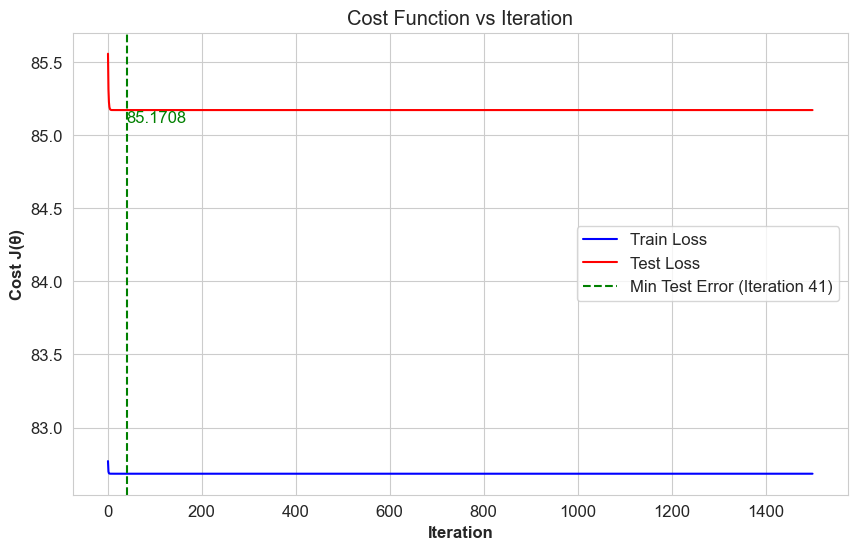

In [32]:
train_loss_history = result_history['SGD'][1000]['train_loss_history']
val_loss_history = result_history['SGD'][1000]['val_loss_history']
iterss = np.arange(1, 1500 + 1)

min_val_loss = val_loss_history.min()
iteration_min_loss = np.argmin(val_loss_history) + 1

# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(iterss, train_loss_history, label='Train Loss', color='blue')
plt.plot(iterss, val_loss_history, label='Test Loss', color='red')

plt.axvline(x=iteration_min_loss, color="green", linestyle="--", label=f"Min Test Error (Iteration {iteration_min_loss})")
plt.text(
    iteration_min_loss,  # x-coordinate
    min_val_loss,        # y-coordinate
    f"{min_val_loss:.4f}",  
    color="green",
    fontsize=12,
    ha="left",  
    va="top"  
)

plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.show()

#### Plotting Mean Test Error vs Train Data size

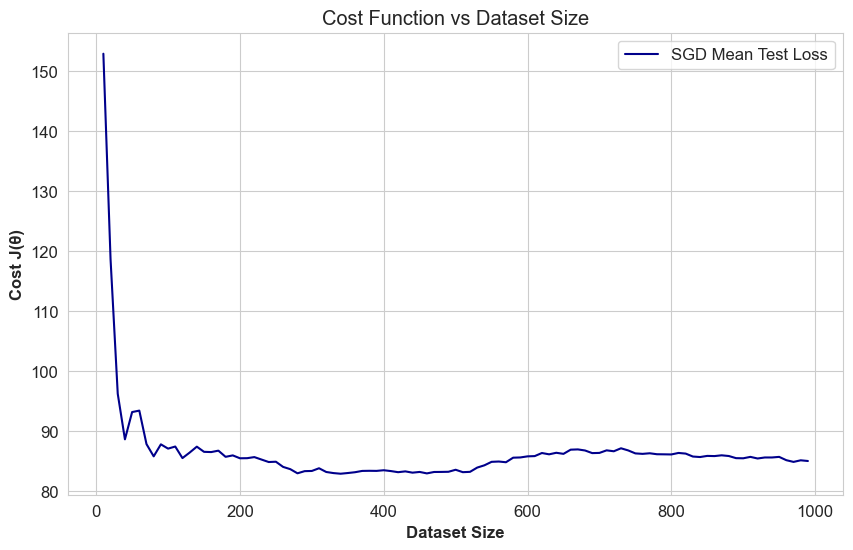

In [82]:
dataset_size = np.arange(10, X_train.shape[0], 10)

mean_val_loss = np.array([np.mean(result_history['SGD'][size]['val_loss_history']) for size in dataset_size])


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(dataset_size, mean_val_loss, label='SGD Mean Test Loss', color='darkblue')

plt.xlabel('Dataset Size')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Dataset Size')
plt.legend()
plt.show()

### Batch Gradient Descent

In [33]:
lr: float = 1e-3
epochs: int = 1500

W_gd = np.zeros((X_train.shape[1], 1)) # params init random

for slice_idx in range(10, X_train.shape[0] + 1, 10):
    print(f'_______________Number of Data used is : {slice_idx}_______________')
    
    W_gd = np.zeros((X_train.shape[1], 1)) # params init random
    X_train_sliced = X_train[:slice_idx] # Slicing training set
    y_sliced = y_train[:slice_idx]
    
    result_history['GD'][slice_idx] = {'train_loss_history':np.zeros(epochs), 'val_loss_history':np.zeros(epochs)} # Preparation for Recording for the specific number of training samples

    for iter in tqdm(range(epochs)):
        y_pred_gd = X_train_sliced @ W_gd 
            
        dJ_dW = (X_train_sliced.T @ (y_sliced - y_pred_gd)) / len(y_sliced) # Calculating gradient in a vectorized way
            
        W_gd = W_gd + lr * dJ_dW # Updating Parameters
        
        
        
       # Recording train loss at each iteration
        y_pred = X_train[:slice_idx] @ W_gd
        result_history['GD'][slice_idx]['train_loss_history'][iter] = MSE(y_train[:slice_idx], y_pred)

        # Recording test loss at each iteration
        y_pred_test = X_test @ W_gd
        result_history['GD'][slice_idx]['val_loss_history'][iter] = MSE(y_test, y_pred_test)
        
result_history['GD']['last_param'] = np.copy(W_gd)


_______________Number of Data used is : 10_______________


100%|██████████| 1500/1500 [00:00<00:00, 18200.97it/s]


_______________Number of Data used is : 20_______________


100%|██████████| 1500/1500 [00:00<00:00, 22258.19it/s]


_______________Number of Data used is : 30_______________


100%|██████████| 1500/1500 [00:00<00:00, 30884.22it/s]


_______________Number of Data used is : 40_______________


100%|██████████| 1500/1500 [00:00<00:00, 22506.86it/s]


_______________Number of Data used is : 50_______________


100%|██████████| 1500/1500 [00:00<00:00, 27337.87it/s]


_______________Number of Data used is : 60_______________


100%|██████████| 1500/1500 [00:00<00:00, 30868.46it/s]


_______________Number of Data used is : 70_______________


100%|██████████| 1500/1500 [00:00<00:00, 22835.42it/s]


_______________Number of Data used is : 80_______________


100%|██████████| 1500/1500 [00:00<00:00, 29737.14it/s]


_______________Number of Data used is : 90_______________


100%|██████████| 1500/1500 [00:00<00:00, 29717.33it/s]


_______________Number of Data used is : 100_______________


100%|██████████| 1500/1500 [00:00<00:00, 28770.81it/s]


_______________Number of Data used is : 110_______________


100%|██████████| 1500/1500 [00:00<00:00, 30530.08it/s]


_______________Number of Data used is : 120_______________


100%|██████████| 1500/1500 [00:00<00:00, 22296.13it/s]


_______________Number of Data used is : 130_______________


100%|██████████| 1500/1500 [00:00<00:00, 30361.09it/s]


_______________Number of Data used is : 140_______________


100%|██████████| 1500/1500 [00:00<00:00, 30004.46it/s]


_______________Number of Data used is : 150_______________


100%|██████████| 1500/1500 [00:00<00:00, 21840.18it/s]


_______________Number of Data used is : 160_______________


100%|██████████| 1500/1500 [00:00<00:00, 29973.02it/s]


_______________Number of Data used is : 170_______________


100%|██████████| 1500/1500 [00:00<00:00, 23225.56it/s]


_______________Number of Data used is : 180_______________


100%|██████████| 1500/1500 [00:00<00:00, 29474.67it/s]


_______________Number of Data used is : 190_______________


100%|██████████| 1500/1500 [00:00<00:00, 30351.72it/s]


_______________Number of Data used is : 200_______________


100%|██████████| 1500/1500 [00:00<00:00, 29435.09it/s]


_______________Number of Data used is : 210_______________


100%|██████████| 1500/1500 [00:00<00:00, 28598.57it/s]


_______________Number of Data used is : 220_______________


100%|██████████| 1500/1500 [00:00<00:00, 30832.91it/s]


_______________Number of Data used is : 230_______________


100%|██████████| 1500/1500 [00:00<00:00, 28899.00it/s]


_______________Number of Data used is : 240_______________


100%|██████████| 1500/1500 [00:00<00:00, 23260.17it/s]


_______________Number of Data used is : 250_______________


100%|██████████| 1500/1500 [00:00<00:00, 21749.73it/s]


_______________Number of Data used is : 260_______________


100%|██████████| 1500/1500 [00:00<00:00, 31002.63it/s]


_______________Number of Data used is : 270_______________


100%|██████████| 1500/1500 [00:00<00:00, 22704.56it/s]


_______________Number of Data used is : 280_______________


100%|██████████| 1500/1500 [00:00<00:00, 29042.14it/s]


_______________Number of Data used is : 290_______________


100%|██████████| 1500/1500 [00:00<00:00, 22995.17it/s]


_______________Number of Data used is : 300_______________


100%|██████████| 1500/1500 [00:00<00:00, 22514.11it/s]


_______________Number of Data used is : 310_______________


100%|██████████| 1500/1500 [00:00<00:00, 23019.23it/s]


_______________Number of Data used is : 320_______________


100%|██████████| 1500/1500 [00:00<00:00, 28067.31it/s]


_______________Number of Data used is : 330_______________


100%|██████████| 1500/1500 [00:00<00:00, 23240.66it/s]


_______________Number of Data used is : 340_______________


100%|██████████| 1500/1500 [00:00<00:00, 30239.39it/s]


_______________Number of Data used is : 350_______________


100%|██████████| 1500/1500 [00:00<00:00, 29491.38it/s]


_______________Number of Data used is : 360_______________


100%|██████████| 1500/1500 [00:00<00:00, 29476.46it/s]


_______________Number of Data used is : 370_______________


100%|██████████| 1500/1500 [00:00<00:00, 30016.63it/s]


_______________Number of Data used is : 380_______________


100%|██████████| 1500/1500 [00:00<00:00, 22283.18it/s]


_______________Number of Data used is : 390_______________


100%|██████████| 1500/1500 [00:00<00:00, 22712.59it/s]


_______________Number of Data used is : 400_______________


100%|██████████| 1500/1500 [00:00<00:00, 29902.36it/s]


_______________Number of Data used is : 410_______________


100%|██████████| 1500/1500 [00:00<00:00, 22503.48it/s]


_______________Number of Data used is : 420_______________


100%|██████████| 1500/1500 [00:00<00:00, 22674.53it/s]


_______________Number of Data used is : 430_______________


100%|██████████| 1500/1500 [00:00<00:00, 28562.99it/s]


_______________Number of Data used is : 440_______________


100%|██████████| 1500/1500 [00:00<00:00, 30012.19it/s]


_______________Number of Data used is : 450_______________


100%|██████████| 1500/1500 [00:00<00:00, 22824.32it/s]


_______________Number of Data used is : 460_______________


100%|██████████| 1500/1500 [00:00<00:00, 29029.27it/s]


_______________Number of Data used is : 470_______________


100%|██████████| 1500/1500 [00:00<00:00, 22569.76it/s]


_______________Number of Data used is : 480_______________


100%|██████████| 1500/1500 [00:00<00:00, 30191.79it/s]


_______________Number of Data used is : 490_______________


100%|██████████| 1500/1500 [00:00<00:00, 22447.92it/s]


_______________Number of Data used is : 500_______________


100%|██████████| 1500/1500 [00:00<00:00, 22772.77it/s]


_______________Number of Data used is : 510_______________


100%|██████████| 1500/1500 [00:00<00:00, 22590.75it/s]


_______________Number of Data used is : 520_______________


100%|██████████| 1500/1500 [00:00<00:00, 22626.33it/s]


_______________Number of Data used is : 530_______________


100%|██████████| 1500/1500 [00:00<00:00, 22371.45it/s]


_______________Number of Data used is : 540_______________


100%|██████████| 1500/1500 [00:00<00:00, 22306.73it/s]


_______________Number of Data used is : 550_______________


100%|██████████| 1500/1500 [00:00<00:00, 22142.72it/s]


_______________Number of Data used is : 560_______________


100%|██████████| 1500/1500 [00:00<00:00, 21514.33it/s]


_______________Number of Data used is : 570_______________


100%|██████████| 1500/1500 [00:00<00:00, 22554.63it/s]


_______________Number of Data used is : 580_______________


100%|██████████| 1500/1500 [00:00<00:00, 24080.56it/s]


_______________Number of Data used is : 590_______________


100%|██████████| 1500/1500 [00:00<00:00, 22337.38it/s]


_______________Number of Data used is : 600_______________


100%|██████████| 1500/1500 [00:00<00:00, 22592.53it/s]


_______________Number of Data used is : 610_______________


100%|██████████| 1500/1500 [00:00<00:00, 21179.65it/s]


_______________Number of Data used is : 620_______________


100%|██████████| 1500/1500 [00:00<00:00, 23337.73it/s]


_______________Number of Data used is : 630_______________


100%|██████████| 1500/1500 [00:00<00:00, 22917.86it/s]


_______________Number of Data used is : 640_______________


100%|██████████| 1500/1500 [00:00<00:00, 22713.33it/s]


_______________Number of Data used is : 650_______________


100%|██████████| 1500/1500 [00:00<00:00, 22533.79it/s]


_______________Number of Data used is : 660_______________


100%|██████████| 1500/1500 [00:00<00:00, 22244.11it/s]


_______________Number of Data used is : 670_______________


100%|██████████| 1500/1500 [00:00<00:00, 22513.87it/s]


_______________Number of Data used is : 680_______________


100%|██████████| 1500/1500 [00:00<00:00, 22539.52it/s]


_______________Number of Data used is : 690_______________


100%|██████████| 1500/1500 [00:00<00:00, 22416.17it/s]


_______________Number of Data used is : 700_______________


100%|██████████| 1500/1500 [00:00<00:00, 22318.75it/s]


_______________Number of Data used is : 710_______________


100%|██████████| 1500/1500 [00:00<00:00, 22728.67it/s]


_______________Number of Data used is : 720_______________


100%|██████████| 1500/1500 [00:00<00:00, 22297.87it/s]


_______________Number of Data used is : 730_______________


100%|██████████| 1500/1500 [00:00<00:00, 18237.90it/s]


_______________Number of Data used is : 740_______________


100%|██████████| 1500/1500 [00:00<00:00, 22320.58it/s]


_______________Number of Data used is : 750_______________


100%|██████████| 1500/1500 [00:00<00:00, 22750.12it/s]


_______________Number of Data used is : 760_______________


100%|██████████| 1500/1500 [00:00<00:00, 22209.01it/s]


_______________Number of Data used is : 770_______________


100%|██████████| 1500/1500 [00:00<00:00, 22394.78it/s]


_______________Number of Data used is : 780_______________


100%|██████████| 1500/1500 [00:00<00:00, 22322.16it/s]


_______________Number of Data used is : 790_______________


100%|██████████| 1500/1500 [00:00<00:00, 22709.56it/s]


_______________Number of Data used is : 800_______________


100%|██████████| 1500/1500 [00:00<00:00, 22654.52it/s]


_______________Number of Data used is : 810_______________


100%|██████████| 1500/1500 [00:00<00:00, 22083.73it/s]


_______________Number of Data used is : 820_______________


100%|██████████| 1500/1500 [00:00<00:00, 22761.32it/s]


_______________Number of Data used is : 830_______________


100%|██████████| 1500/1500 [00:00<00:00, 22040.95it/s]


_______________Number of Data used is : 840_______________


100%|██████████| 1500/1500 [00:00<00:00, 22588.64it/s]


_______________Number of Data used is : 850_______________


100%|██████████| 1500/1500 [00:00<00:00, 18345.43it/s]


_______________Number of Data used is : 860_______________


100%|██████████| 1500/1500 [00:00<00:00, 22092.73it/s]


_______________Number of Data used is : 870_______________


100%|██████████| 1500/1500 [00:00<00:00, 22657.46it/s]


_______________Number of Data used is : 880_______________


100%|██████████| 1500/1500 [00:00<00:00, 22225.17it/s]


_______________Number of Data used is : 890_______________


100%|██████████| 1500/1500 [00:00<00:00, 22544.04it/s]


_______________Number of Data used is : 900_______________


100%|██████████| 1500/1500 [00:00<00:00, 22559.48it/s]


_______________Number of Data used is : 910_______________


100%|██████████| 1500/1500 [00:00<00:00, 22215.36it/s]


_______________Number of Data used is : 920_______________


100%|██████████| 1500/1500 [00:00<00:00, 18191.50it/s]


_______________Number of Data used is : 930_______________


100%|██████████| 1500/1500 [00:00<00:00, 22501.79it/s]


_______________Number of Data used is : 940_______________


100%|██████████| 1500/1500 [00:00<00:00, 22161.75it/s]


_______________Number of Data used is : 950_______________


100%|██████████| 1500/1500 [00:00<00:00, 18126.82it/s]


_______________Number of Data used is : 960_______________


100%|██████████| 1500/1500 [00:00<00:00, 17746.11it/s]


_______________Number of Data used is : 970_______________


100%|██████████| 1500/1500 [00:00<00:00, 22628.53it/s]


_______________Number of Data used is : 980_______________


100%|██████████| 1500/1500 [00:00<00:00, 22152.23it/s]


_______________Number of Data used is : 990_______________


100%|██████████| 1500/1500 [00:00<00:00, 22508.39it/s]


_______________Number of Data used is : 1000_______________


100%|██████████| 1500/1500 [00:00<00:00, 22293.68it/s]


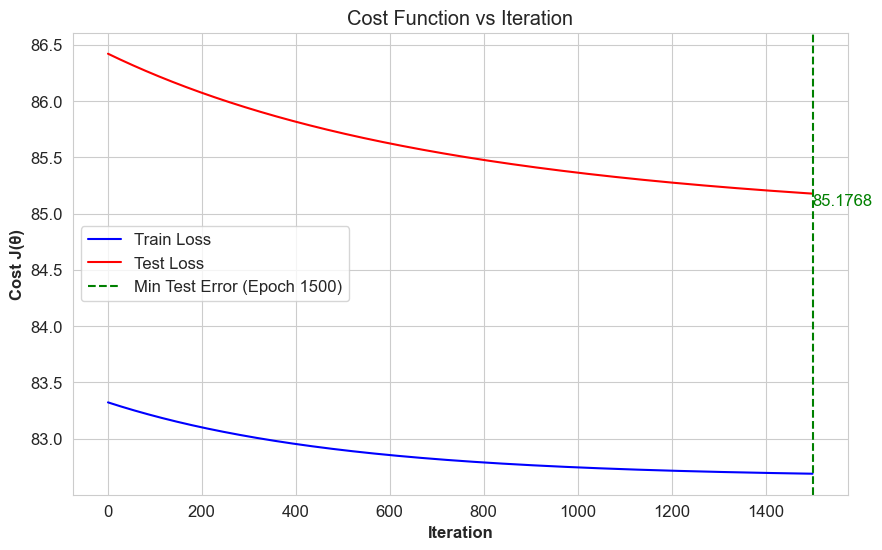

In [34]:
train_loss_history = result_history['GD'][1000]['train_loss_history']
val_loss_history = result_history['GD'][1000]['val_loss_history']
iterss = np.arange(1, epochs + 1)

min_val_loss = val_loss_history.min()
iteration_min_loss = np.argmin(val_loss_history) + 1

# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(iterss, train_loss_history, label='Train Loss', color='blue')
plt.plot(iterss, val_loss_history, label='Test Loss', color='red')

plt.axvline(x=iteration_min_loss, color="green", linestyle="--", label=f"Min Test Error (Epoch {iteration_min_loss})")
plt.text(
    iteration_min_loss,  # x-coordinate
    min_val_loss,        # y-coordinate
    f"{min_val_loss:.4f}",  
    color="green",
    fontsize=12,
    ha="left",  
    va="top"  
)

plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.show()

#### Plotting Mean Test Error vs Train Data size

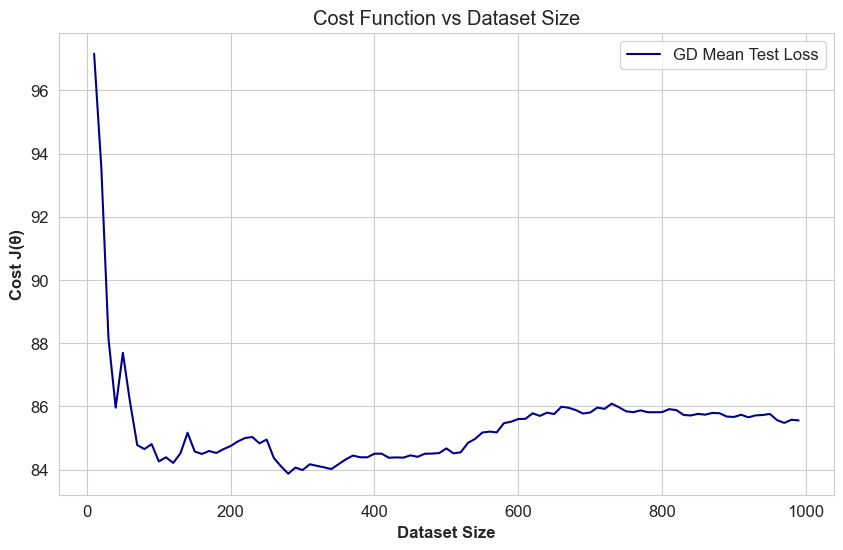

In [35]:
dataset_size = np.arange(10, X_train.shape[0], 10)

mean_val_loss = np.array([np.mean(result_history['GD'][size]['val_loss_history']) for size in dataset_size])


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(dataset_size, mean_val_loss, label='GD Mean Test Loss', color='darkblue')

plt.xlabel('Dataset Size')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Dataset Size')
plt.legend()
plt.show()

### Comparsion of Test error For Three Approaches

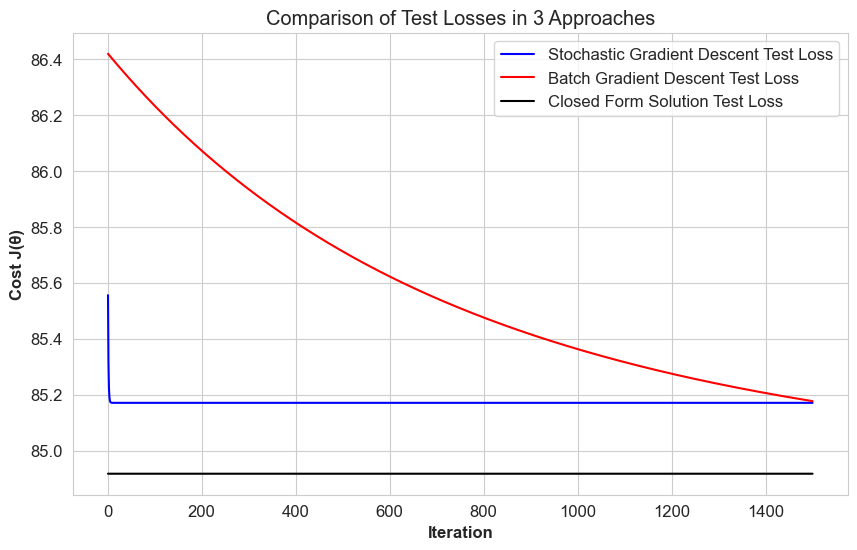

In [36]:
sgd_val_loss_history = result_history['SGD'][1000]['val_loss_history']

gd_val_loss_history = result_history['GD'][1000]['val_loss_history']



gnd_val_loss = MSE(X_test @ W_c, y_test)
ground_truth_loss = np.array([gnd_val_loss for i in range(epochs)])

iterss = np.arange(1, epochs + 1)


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(iterss, sgd_val_loss_history, label='Stochastic Gradient Descent Test Loss', color='blue')
plt.plot(iterss, gd_val_loss_history, label='Batch Gradient Descent Test Loss', color='red')
plt.plot(iterss, ground_truth_loss, label='Closed Form Solution Test Loss', color='black')



plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Comparison of Test Losses in 3 Approaches')
plt.legend()
plt.show()

### Comparison of Costs vs Dataset size

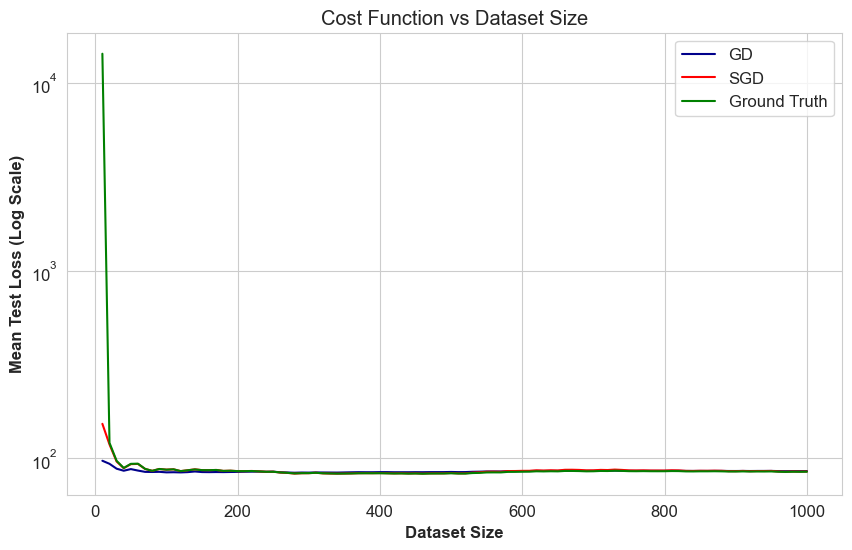

In [44]:
dataset_size = np.arange(10, X_train.shape[0] + 1, 10)

gd_mean_val_loss = np.array([np.mean(result_history['GD'][size]['val_loss_history']) for size in dataset_size])
sgd_mean_val_loss = np.array([np.mean(result_history['SGD'][size]['val_loss_history']) for size in dataset_size])
gt_mean_val_loss = np.array([np.mean(result_history['Ground Truth'][size]['val_loss_history']) for size in dataset_size])



# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(dataset_size, gd_mean_val_loss, label='GD', color='darkblue')
plt.plot(dataset_size, sgd_mean_val_loss, label='SGD', color='red')
plt.plot(dataset_size, gt_mean_val_loss, label='Ground Truth', color='green')


plt.xlabel('Dataset Size')
plt.ylabel('Mean Test Loss (Log Scale)')
plt.yscale('log')
plt.title('Cost Function vs Dataset Size')
plt.legend()
plt.show()

### Adding $L_2$ Regularization to Closed Form Solution

$$
\theta = (X^TX + \lambda I)^{-1}X^T\vec{y}
$$

In [45]:
lambda_ = 1e-2
I = np.eye(X_train.shape[1])

inv_XTX = inv((X_train.T @ X_train) + lambda_ * I)
W_c_ridge = inv_XTX @ X_train.T @ y_train

print("____W in Closed Form____\n", W_c_ridge)

print("Shape of W : ", W_c_ridge.shape)

____W in Closed Form____
 [[ 0.        ]
 [ 0.51307981]
 [-0.04573999]
 [ 0.07425879]
 [ 0.12183648]
 [ 0.61219884]
 [ 0.03752143]
 [ 0.01107838]
 [-0.02806782]
 [-0.01926974]]
Shape of W :  (10, 1)


In [46]:
closed_ridge_val_loss = MSE(X_test @ W_c_ridge, y_test)
print(f'Test Error Closed Form is: {closed_ridge_val_loss}')

Test Error Closed Form is: 84.91718283175307


### Finding the best $\lambda$

In [19]:
lambda_vals = np.logspace(-4, 4, num=9)


ridge_train_loss = []
ridge_test_loss = []

for lambda_ in lambda_vals:
    I = np.eye(X_train.shape[1])
    inv_XTX = inv((X_train.T @ X_train) + lambda_ * I)
    W_c_ridge = inv_XTX @ X_train.T @ y_train
    
    train_e = MSE(X_train @ W_c_ridge, y_train)
    test_e = MSE(X_test @ W_c_ridge, y_test)
    
    ridge_train_loss.append(train_e)
    ridge_test_loss.append(test_e)
    
    
    
best_lambda = lambda_vals[np.argmin(ridge_test_loss)]

I = np.eye(X_train.shape[1])
inv_XTX = inv((X_train.T @ X_train) + best_lambda * I)
W_c_ridge = inv_XTX @ X_train.T @ y_train

In [28]:
lambda_vals

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

In [29]:
best_lambda

0.0001

In [31]:
np.argmin(ridge_test_loss)

0

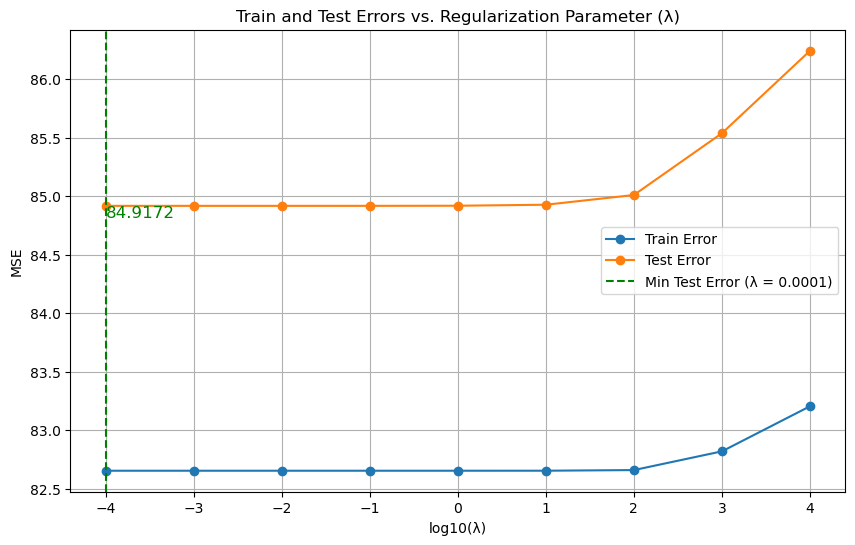

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambda_vals), ridge_train_loss, label="Train Error", marker="o")
plt.plot(np.log10(lambda_vals), ridge_test_loss, label="Test Error", marker="o")

plt.axvline(x=np.log10(best_lambda), color="green", linestyle="--", label=f"Min Test Error (λ = {best_lambda})")
plt.text(
    np.log10(best_lambda),  # x-coordinate
    ridge_test_loss[np.argmin(ridge_test_loss)],        # y-coordinate
    f"{ridge_test_loss[np.argmin(ridge_test_loss)]:.4f}",  
    color="green",
    fontsize=12,
    ha="left",  
    va="top"  
)
plt.xlabel("log10(λ)")
plt.ylabel("MSE")
plt.title("Train and Test Errors vs. Regularization Parameter (λ)")
plt.grid()
plt.legend()
plt.show()

### Comparing Results with and Without Regularization

Solution of ('Closed Form Regularized', 'Closed Form') has Test Loss = (84.91717324551863, 84.917173146217)


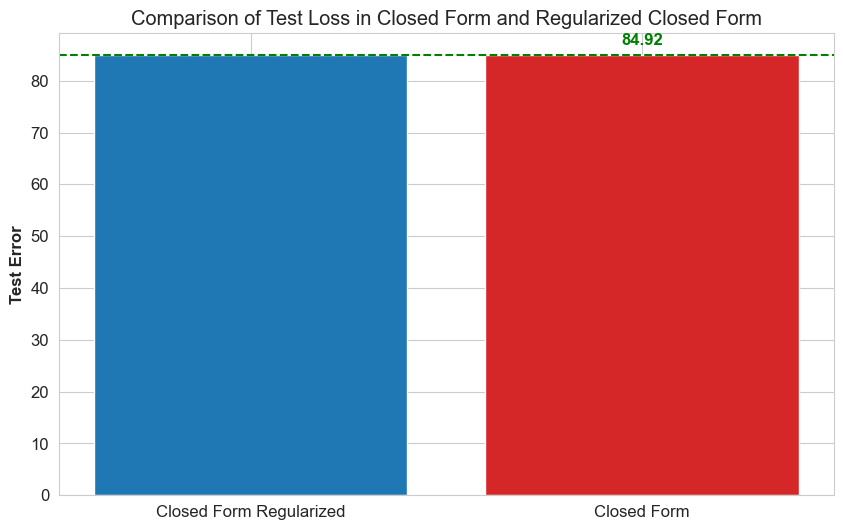

In [49]:
closed_val_loss = MSE(X_test @ W_c, y_test)
closed_ridge_val_loss = MSE(X_test @ W_c_ridge, y_test)

labels = ('Closed Form Regularized','Closed Form')
heights = (closed_ridge_val_loss, closed_val_loss)

min_val = min(heights)
min_idx = heights.index(min_val)

# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.bar(x=labels ,height=heights, color=['tab:blue', 'tab:red'])

# Drawing horizontal line at the minimum value
plt.axhline(y=min_val, color='green', linestyle='--', linewidth=1.5, label=f'Min Test Error = {min_val:.2f}')

# Annotate the minimum value
plt.text(
    x=min_idx,              
    y=min_val + 0.05 * min_val, 
    s=f'{min_val:.2f}',     
    color='green',
    fontsize=12,
    fontweight='bold',
    ha='center',
    va='top'
)

print(f'Solution of {labels} has Test Loss = {heights}')
plt.ylabel('Test Error')
plt.title('Comparison of Test Loss in Closed Form and Regularized Closed Form')
plt.show()